In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Download all required NLTK data
print("Downloading required NLTK data...")
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')

# Verify downloads
try:
    # Test NLTK components
    test_text = "This is a test sentence."
    tokens = word_tokenize(test_text)
    stops = stopwords.words('english')
    print("\nNLTK setup successful!")
except LookupError as e:
    print("Error: NLTK data not properly installed.")
    print("Please run the following commands:")
    print("import nltk")
    print("nltk.download('all')")
    raise e

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sadas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sadas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\sadas\AppData\Roaming\nltk_data...



NLTK setup successful!


[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sadas\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
# Read the dataset
try:
    df = pd.read_csv('../data/train.csv')
    print("Dataset loaded successfully!")
    print("Dataset Shape:", df.shape)
    print("\nFirst few rows:")
    display(df.head())
    
    # Check for missing values
    print("\nMissing values:")
    print(df.isnull().sum())
    
    # Display class distribution
    print("\nClass Distribution (%):")
    print(df['label'].value_counts(normalize=True) * 100)
except FileNotFoundError:
    print("Error: Please make sure train.csv is in the data folder!")


Dataset loaded successfully!
Dataset Shape: (5574, 2)

First few rows:


,sms,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0



Missing values:
sms      0
label    0
dtype: int64

Class Distribution (%):
label
0    86.598493
1    13.401507
Name: proportion, dtype: float64


In [3]:
class TextPreprocessor:
    def __init__(self):
        # Initialize stopwords
        try:
            self.stop_words = set(stopwords.words('english'))
            print("Preprocessor initialized successfully!")
        except LookupError:
            print("Error: Stopwords not found. Downloading now...")
            nltk.download('stopwords')
            self.stop_words = set(stopwords.words('english'))
    
    def clean_text(self, text):
        """Clean and preprocess text data"""
        try:
            # Convert to string and lowercase
            text = str(text).lower()
            
            # Remove special characters and numbers
            text = re.sub(r'[^a-zA-Z\s]', '', text)
            
            # Simple word split instead of word_tokenize if NLTK fails
            try:
                tokens = word_tokenize(text)
            except LookupError:
                tokens = text.split()
            
            # Remove stopwords
            tokens = [t for t in tokens if t not in self.stop_words]
            
            return ' '.join(tokens)
        except Exception as e:
            print(f"Error processing text: {text}")
            print(f"Error message: {str(e)}")
            return text  # Return original text if processing fails

# Create preprocessor instance
preprocessor = TextPreprocessor()

# Test the preprocessor
test_text = "Hello, this is a test message!"
print("\nTesting preprocessor with:", test_text)
print("Cleaned result:", preprocessor.clean_text(test_text))

Preprocessor initialized successfully!

Testing preprocessor with: Hello, this is a test message!
Cleaned result: hello test message


In [3]:
# Process all texts with error handling
print("Starting text preprocessing...")
try:
    df['cleaned_text'] = df['sms'].apply(preprocessor.clean_text)
    print("Text preprocessing completed successfully!")
    
    # Show example
    print("\nPreprocessing Example:")
    idx = 0
    print("Original:", df['sms'][idx])
    print("Cleaned:", df['cleaned_text'][idx])
except Exception as e:
    print("Error during preprocessing:", str(e))

Starting text preprocessing...
Error during preprocessing: name 'preprocessor' is not defined


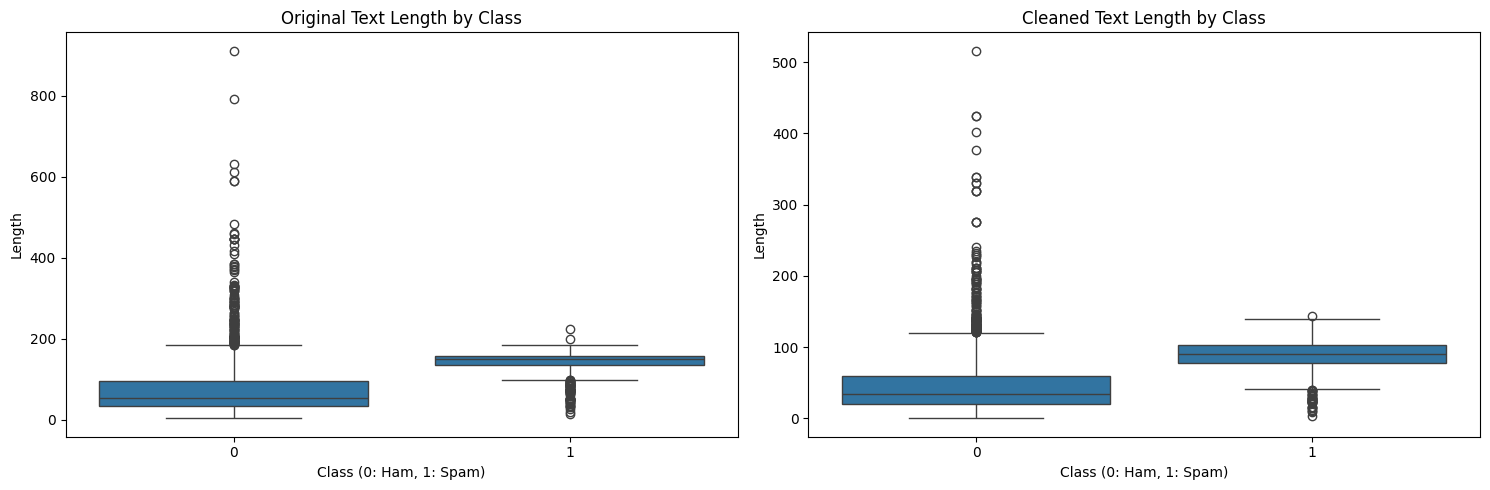


Preprocessed data saved to: ../data/preprocessed_data.csv


In [5]:
try:
    # Calculate text lengths
    df['text_length'] = df['sms'].str.len()
    df['cleaned_length'] = df['cleaned_text'].str.len()

    # Create visualizations
    plt.figure(figsize=(15, 5))

    # Original text length distribution
    plt.subplot(1, 2, 1)
    sns.boxplot(x='label', y='text_length', data=df)
    plt.title('Original Text Length by Class')
    plt.ylabel('Length')
    plt.xlabel('Class (0: Ham, 1: Spam)')

    # Cleaned text length distribution
    plt.subplot(1, 2, 2)
    sns.boxplot(x='label', y='cleaned_length', data=df)
    plt.title('Cleaned Text Length by Class')
    plt.ylabel('Length')
    plt.xlabel('Class (0: Ham, 1: Spam)')

    plt.tight_layout()
    plt.show()

    # Save preprocessed data
    output_path = '../data/preprocessed_data.csv'
    df.to_csv(output_path, index=False)
    print(f"\nPreprocessed data saved to: {output_path}")
except Exception as e:
    print("Error during analysis:", str(e))